In [66]:
#importing the requests library
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

Using [marketstack](https://marketstack.com/?utm_source=Geekflare&utm_medium=LeadsAcquisition&utm_content=Listing) to make API calls to retrieve end-of-day stock price of your preferred company.

API documentations can be found [here](https://marketstack.com/documentation). Code examples for different languages can be found [here](https://marketstack.com/documentation#php)

In [83]:
def enter_ticker(symbol):
    #making the request
    url = 'http://api.marketstack.com/v1/eod'
    params = {
        'access_key' : '038908b69357069eadcfc963cbafe6ee',
        'symbols' : symbol,
        'limit' : 600
         }
    resp = requests.get(url,params=params)
    data = resp.json()
    
    #getting the list of adjusted close price and dates
    dates = []
    adj_close = []
    for i in data['data']:
            adj_close.append(i['adj_close'])
            dates.append(i['date'])
            
    #converting the json data into a df
    df = pd.DataFrame(list(zip(dates,adj_close)),columns=['date','adj_close'+'_'+symbol])
    df['date'] = df['date'].astype('datetime64[ns]')
    df.set_index('date',inplace=True)
    

    return df

In [84]:
amazon = enter_ticker('AMZN')
amazon

,adj_close_AMZN
date,
2023-03-07,93.5500
2023-03-06,93.7500
2023-03-03,94.9000
2023-03-02,92.1300
2023-03-01,92.1700
...,...
2022-03-14,2837.0601
2022-03-11,2910.4900
2022-03-10,2936.3501


In [85]:
tesla = enter_ticker('TSLA')
tesla

,adj_close_TSLA
date,
2023-03-07,187.71
2023-03-06,193.81
2023-03-03,197.79
2023-03-02,190.90
2023-03-01,202.77
...,...
2022-03-14,766.37
2022-03-11,795.35
2022-03-10,838.30


In [86]:
voo = enter_ticker('VOO')
voo

,adj_close_VOO
date,
2023-03-07,365.98
2023-03-06,371.73
2023-03-03,371.28
2023-03-02,365.49
2023-03-01,362.78
...,...
2022-03-14,383.34
2022-03-11,386.16
2022-03-10,391.15


In [92]:
combined_df = pd.concat([amazon,tesla,voo],axis=1)
combined_df

,adj_close_AMZN,adj_close_TSLA,adj_close_VOO
date,,,
2023-03-07,93.5500,187.71,365.98
2023-03-06,93.7500,193.81,371.73
2023-03-03,94.9000,197.79,371.28
2023-03-02,92.1300,190.90,365.49
2023-03-01,92.1700,202.77,362.78
...,...,...,...
2022-03-14,2837.0601,766.37,383.34
2022-03-11,2910.4900,795.35,386.16
2022-03-10,2936.3501,838.30,391.15


<AxesSubplot:xlabel='date'>

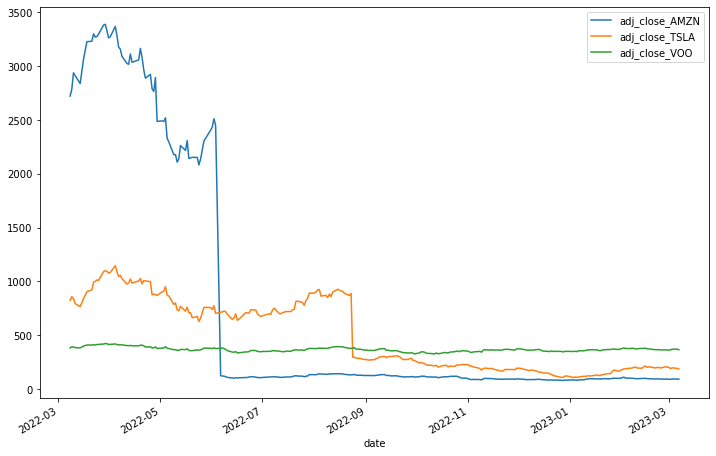

In [91]:
combined_df.plot(figsize=(12,8))